In [2]:
import pandas as pd


file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\boundaries_precinct\chi_precinct2012.dta'


df = pd.read_stata(file_path)


print(df.columns)

print(df.dtypes)

df.head(10)

Index(['_ID', '_CX', '_CY', 'prid2012', 'ward2012', 'prec2012', 'OID'], dtype='object')
_ID           int16
_CX         float64
_CY         float64
prid2012     object
ward2012       int8
prec2012       int8
OID           int16
dtype: object


,_ID,_CX,_CY,prid2012,ward2012,prec2012,OID
0,1,-87.691110,41.968937,40038,40,38,1
1,2,-87.688487,41.992313,40039,40,39,2
2,3,-87.673284,41.988733,40036,40,36,3
3,4,-87.672947,41.996867,40037,40,37,4
4,5,-87.632024,41.899625,02032,2,32,5
5,6,-87.633315,41.911367,02033,2,33,6
6,7,-87.630589,41.906952,02030,2,30,7
7,8,-87.629854,41.909517,02031,2,31,8
8,9,-87.629312,41.905584,02038,2,38,9
9,10,-87.632663,41.901735,02039,2,39,10


In [2]:
import pandas as pd

In [4]:



file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_pct.dta'


df = pd.read_stata(file_path)


print(df.columns)

#print(df.dtypes)

#df.head(10)

Index(['gjoin2010', 'cast_1975p', 'reg_1975p', 'd_singer_w_1975p',
       'd_daley_rj_1975p', 'd_newhouse_rh_1975p', 'd_hanrahan_e_1975p',
       'cast_1975g', 'reg_1975g', 'd_daley_rj_1975g',
       ...
       'n_ford_l_2019g', 'n_sales_n_2019g', 'n_lightfoot_l_2019g',
       'n_fioretti_r_2019g', 'n_kozlar_j_2019g', 'n_moreno_pj_2019g',
       'n_laspata_d_2019g', 'cast_2019r', 'n_lightfoot_l_2019r',
       'n_preckwinkle_t_2019r'],
      dtype='object', length=153)


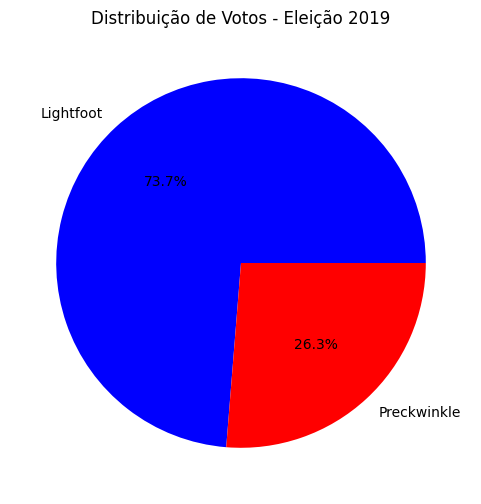

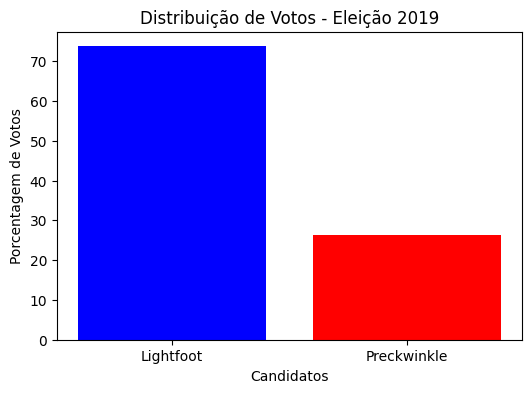

: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_pct.dta'  # Substitua pelo caminho correto do arquivo
df = pd.read_stata(file_path)


total_cast = df['cast_2019r'].sum()


lightfoot_total = (df['n_lightfoot_l_2019r'] * df['cast_2019r']).sum() / total_cast * 100
preckwinkle_total = (df['n_preckwinkle_t_2019r'] * df['cast_2019r']).sum() / total_cast * 100


total_percentages = {
    'Lightfoot': lightfoot_total,
    'Preckwinkle': preckwinkle_total
}


plt.figure(figsize=(6, 6))
plt.pie(total_percentages.values(), labels=total_percentages.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuição de Votos - Eleição 2019')
plt.show()


plt.figure(figsize=(6, 4))
plt.bar(total_percentages.keys(), total_percentages.values(), color=['blue', 'red'])
plt.xlabel('Candidatos')
plt.ylabel('Porcentagem de Votos')
plt.title('Distribuição de Votos - Eleição 2019')
plt.show()


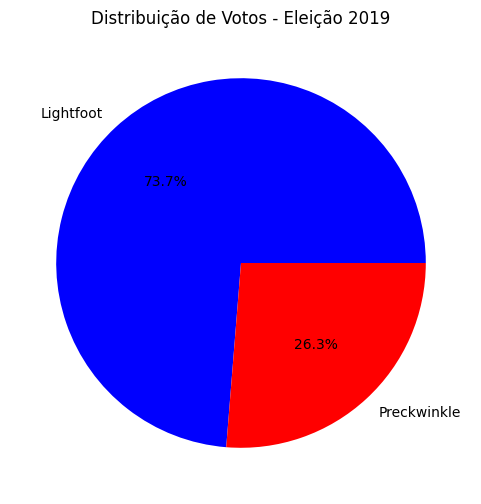

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_pct.dta'  # Substitua pelo caminho correto do arquivo
df = pd.read_stata(file_path)


total_cast = df['cast_2019r'].sum()


lightfoot_total = (df['n_lightfoot_l_2019r'] * df['cast_2019r']).sum() / total_cast * 100
preckwinkle_total = (df['n_preckwinkle_t_2019r'] * df['cast_2019r']).sum() / total_cast * 100


total_percentages = {
    'Lightfoot': lightfoot_total,
    'Preckwinkle': preckwinkle_total
}


plt.figure(figsize=(6, 6))
plt.pie(total_percentages.values(), labels=total_percentages.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuição de Votos - Eleição 2019')
plt.show()

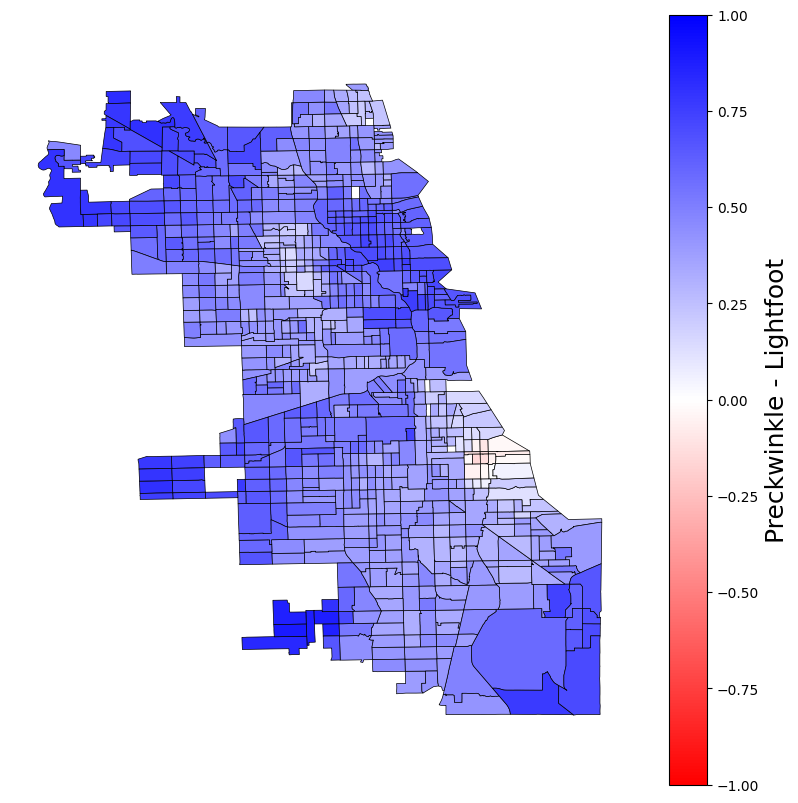

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import numpy as np


geo_df = pd.read_csv(r"C:\Users\Raissa\Documents\dev\TCC\AnaliseExploratoria\chicago_tracts_boundaries.csv")
geo_df["geometry"] = geo_df["geometry_coordinates"].apply(loads)
geo_gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

dados_df = pd.read_csv(r"C:\Users\Raissa\Documents\dev\TCC\AnaliseExploratoria\chicago_tags_votes_tract.csv")


merged_gdf = geo_gdf.merge(dados_df, on="geoid10")


merged_gdf["proporcao"] = (merged_gdf["n_lightfoot_l_2019r"] - merged_gdf["n_preckwinkle_t_2019r"]) / (merged_gdf["n_lightfoot_l_2019r"] + merged_gdf["n_preckwinkle_t_2019r"]) 

fig, ax = plt.subplots(figsize=(10, 10))


cmap = plt.cm.bwr.reversed() 


norm = plt.Normalize(vmin=-1, vmax=1)


merged_gdf.plot(column="proporcao", cmap=cmap, norm=norm, edgecolor="black", linewidth=0.5, ax=ax)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(" Preckwinkle - Lightfoot ", fontsize=18)


#ax.set_title("Resultado da Eleição por Região", fontsize=14)
ax.axis("off")

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_pct.dta'  # Substitua pelo caminho correto do arquivo
df = pd.read_stata(file_path)


total_cast = df['cast_2019g'].sum()


lightfoot_total = (df['n_lightfoot_l_2019r'] * df['cast_2019r']).sum() / total_cast * 100
preckwinkle_total = (df['n_preckwinkle_t_2019r'] * df['cast_2019r']).sum() / total_cast * 100


total_percentages = {
    'Lightfoot': lightfoot_total,
    'Preckwinkle': preckwinkle_total
}


plt.figure(figsize=(6, 6))
plt.pie(total_percentages.values(), labels=total_percentages.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuição de Votos - Eleição 2019')
plt.show()

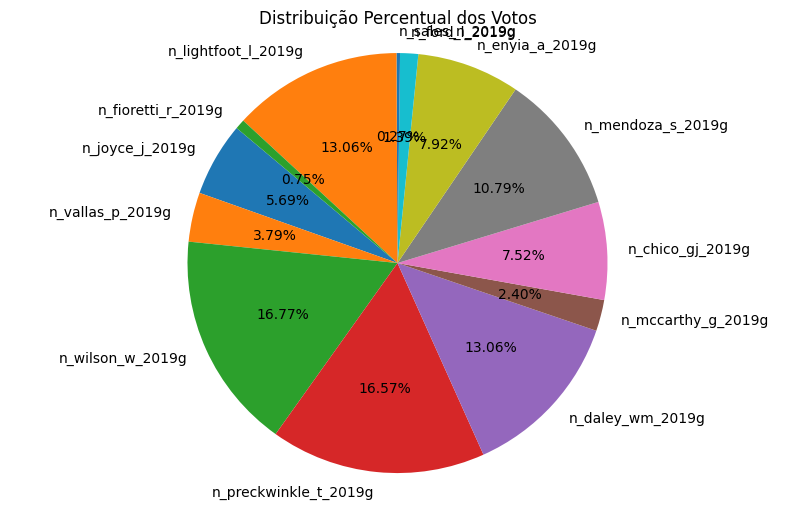

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def process_dta(file_path):

    df = pd.read_stata(file_path)
   
    required_columns = [
        "cast_2019g", "n_joyce_j_2019g", "n_vallas_p_2019g", "n_wilson_w_2019g", 
        "n_preckwinkle_t_2019g", "n_daley_wm_2019g", "n_mccarthy_g_2019g", 
        "n_chico_gj_2019g", "n_mendoza_s_2019g", "n_enyia_a_2019g", "n_ford_l_2019g", 
        "n_sales_n_2019g", "n_lightfoot_l_2019g", "n_fioretti_r_2019g"
    ]
    
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Colunas ausentes no arquivo: {missing_cols}")

    total_cast = df["cast_2019g"].sum()
    
    percentages = {
        col: (df[col] / df["cast_2019g"]).sum() * 100 for col in required_columns[1:]
    }
    

    plt.figure(figsize=(10, 6))
    plt.pie(percentages.values(), labels=percentages.keys(), autopct="%.2f%%", startangle=140)
    plt.title("Distribuição Percentual dos Votos")
    plt.axis("equal")  
    plt.show()
    
    return percentages

file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_pct.dta'
percentages = process_dta(file_path)

In [4]:


file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_precincts\mayor2019r.dta'


df = pd.read_stata(file_path)


print(df.columns)

print(df.dtypes)

df.head(10)

Index(['prid2012', 'ward2012', 'precinct2012', 'cast_2019r',
       'n_lightfoot_l_2019r', 'n_preckwinkle_t_2019r'],
      dtype='object')
prid2012                  object
ward2012                 float32
precinct2012                int8
cast_2019r                 int16
n_lightfoot_l_2019r        int16
n_preckwinkle_t_2019r      int16
dtype: object


,prid2012,ward2012,precinct2012,cast_2019r,n_lightfoot_l_2019r,n_preckwinkle_t_2019r
0,01001,1.0,1,262,176,86
1,01002,1.0,2,207,134,73
2,01003,1.0,3,279,210,69
3,01004,1.0,4,281,209,72
4,01005,1.0,5,256,186,70
5,01006,1.0,6,236,174,62
6,01007,1.0,7,200,147,53
7,01008,1.0,8,264,181,83
8,01009,1.0,9,251,167,84
9,01010,1.0,10,261,209,52


CENSUS

In [2]:
import pandas as pd
file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\census\chi_census_1970_2017_abs.dta'


df = pd.read_stata(file_path)


print(df.columns)

print(df.dtypes)

df.head(10)

Index(['gjoin2010', 'year', 'tractid10', 'placepop2010', 'placedw2010',
       'globd', 'globg', 'v_arehectland', 'v_arehectwatr', 'intptlat',
       ...
       'v_age_tot', 'q_distnorm', 's_distm', 's_dist_inv', 'v_walkscore',
       'v_transitscore', 'v_bikescore', 's_walkscore', 's_transitscore',
       's_bikescore'],
      dtype='object', length=120)
gjoin2010          object
year              float32
tractid10          object
placepop2010        int32
placedw2010         int32
                   ...   
v_transitscore    float32
v_bikescore       float32
s_walkscore       float32
s_transitscore    float32
s_bikescore       float32
Length: 120, dtype: object


,gjoin2010,year,tractid10,placepop2010,placedw2010,globd,globg,v_arehectland,v_arehectwatr,intptlat,...,v_age_tot,q_distnorm,s_distm,s_dist_inv,v_walkscore,v_transitscore,v_bikescore,s_walkscore,s_transitscore,s_bikescore
0,G1700310010100,1970.0,17031010100,4854,2624,,,381061.0,0.0,42.021263,...,6911.350098,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
1,G1700310010100,1980.0,17031010100,4854,2624,wbha,Global,381061.0,0.0,42.021263,...,6285.672363,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
2,G1700310010100,1990.0,17031010100,4854,2624,wbha,Global,381061.0,0.0,42.021263,...,6388.292480,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
3,G1700310010100,2000.0,17031010100,4854,2624,wbha,Global,381061.0,0.0,42.021263,...,5371.067383,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
4,G1700310010100,2010.0,17031010100,4854,2624,wbha,Global,381061.0,0.0,42.021263,...,4854.000000,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
5,G1700310010100,2017.0,17031010100,4854,2624,,,381061.0,0.0,42.021263,...,4599.000000,0.587703,1.094714,-1.094714,87.5,75.75,77.75,0.909183,0.995684,0.464143
6,G1700310010201,1970.0,17031010201,6450,2941,,,504470.0,0.0,42.016006,...,6196.885254,0.576950,1.031955,-1.031955,86.5,75.75,72.75,0.817620,0.995684,0.084154
7,G1700310010201,1980.0,17031010201,6450,2941,wbha,Global,504470.0,0.0,42.016006,...,5713.625000,0.576950,1.031955,-1.031955,86.5,75.75,72.75,0.817620,0.995684,0.084154
8,G1700310010201,1990.0,17031010201,6450,2941,wbha,Global,504470.0,0.0,42.016006,...,6486.557617,0.576950,1.031955,-1.031955,86.5,75.75,72.75,0.817620,0.995684,0.084154
9,G1700310010201,2000.0,17031010201,6450,2941,wbha,Global,504470.0,0.0,42.016006,...,7563.999512,0.576950,1.031955,-1.031955,86.5,75.75,72.75,0.817620,0.995684,0.084154


In [9]:
import pandas as pd
file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\census\chi_census_1970_2017_pct.dta'


df = pd.read_stata(file_path)


print(df.columns)

print(df.dtypes)

df.head(10)

Index(['gjoin2010', 'tractid10', 'year', 'v_arehectland', 'v_arehectwatr',
       'intptlat', 'intptlong', 'placepop2010', 'placedw2010', 'globd',
       'globg', 'v_dw_vcnt', 'v_dwo_tot', 'v_dwtapt_', 'v_edc025phigh',
       'v_edc025ppostunivbach', 'v_ethasiaeastchin', 'v_ethasiaeastfili',
       'v_ethasiaeastjapa', 'v_ethasiaeastkore', 'v_ethltammexi',
       'v_ethcaripuri', 'v_ethcaricuba', 'v_etheuroeastruss',
       'v_etheurosoutital', 'v_etheurowestgerm', 'v_etheurobritiris',
       'v_etheuronort_tot', 'v_ethasiaeastviet', 'v_fmlparf_tot', 'v_hheown_',
       'v_imball_immieurorusf', 'v_imball_immieuroital',
       'v_imball_immieurogerm', 'v_imball_immieuroirel',
       'v_imball_immieuronort', 'v_imball_immi_tot', 'v_imsnat_',
       'v_imbrec__tot', 'v_lfrunem', 'v_lfcall_fema', 'v_lfoprof_ltdb',
       'v_lfimanu_ltdb', 'v_lfcall_self_tot', 'v_lnh1resothr', 'v_lnken__poor',
       'v_marmaclmarr', 'v_marnmcldivo', 'v_povpers', 'v_vm_visiasia',
       'v_vm_visihawa', 'v_

,gjoin2010,tractid10,year,v_arehectland,v_arehectwatr,intptlat,intptlong,placepop2010,placedw2010,globd,...,s_transitscore,s_bikescore,s_hhcown_valu_med,s_hhcrentcost_med,s_initotl_tot,s_inhtotl_med,s_popdens,s_popdensinv,s_distm,s_distm_inv
0,G1700310010100,17031010100,1970.0,381061.0,0.0,42.021263,-87.669846,4854,2624,,...,0.995684,0.464143,1.126219,0.198549,0.422052,-0.886815,1.070037,-1.070037,1.094140,-1.094140
1,G1700310010100,17031010100,1980.0,381061.0,0.0,42.021263,-87.669846,4854,2624,wbha,...,0.995684,0.464143,0.653426,0.324921,-0.412462,-0.781360,1.049597,-1.049597,1.094140,-1.094140
2,G1700310010100,17031010100,1990.0,381061.0,0.0,42.021263,-87.669846,4854,2624,wbha,...,0.995684,0.464143,0.313675,-0.029901,-0.458060,-0.887231,1.097929,-1.097929,1.094140,-1.094140
3,G1700310010100,17031010100,2000.0,381061.0,0.0,42.021263,-87.669846,4854,2624,wbha,...,0.995684,0.464143,0.083501,-0.285334,-0.301837,-0.667043,0.714346,-0.714346,1.094140,-1.094140
4,G1700310010100,17031010100,2010.0,381061.0,0.0,42.021263,-87.669846,4854,2624,wbha,...,0.995684,0.464143,-0.159381,-0.378448,-0.264769,-0.809883,0.655824,-0.655824,1.094140,-1.094140
5,G1700310010100,17031010100,2017.0,381061.0,0.0,42.021263,-87.669846,4854,2624,,...,0.995684,0.464143,-0.159381,-0.378448,-0.264769,-0.809883,0.437824,-0.437824,1.094140,-1.094140
6,G1700310010201,17031010201,1970.0,504470.0,0.0,42.016006,-87.680145,6450,2941,,...,0.995684,0.084154,0.460963,0.959739,0.679437,0.387849,0.359395,-0.359395,1.031414,-1.031414
7,G1700310010201,17031010201,1980.0,504470.0,0.0,42.016006,-87.680145,6450,2941,wbha,...,0.995684,0.084154,0.492109,0.966020,0.450267,0.121316,0.390560,-0.390560,1.031414,-1.031414
8,G1700310010201,17031010201,1990.0,504470.0,0.0,42.016006,-87.680145,6450,2941,wbha,...,0.995684,0.084154,0.048922,0.627946,-0.027527,0.095790,0.622779,-0.622779,1.031414,-1.031414
9,G1700310010201,17031010201,2000.0,504470.0,0.0,42.016006,-87.680145,6450,2941,wbha,...,0.995684,0.084154,-0.178955,0.100207,-0.418439,-0.361138,0.819503,-0.819503,1.031414,-1.031414


In [1]:
import pandas as pd
file_path = r'C:\Users\Raissa\Documents\dev\TCC\Chicago_City_Data\Chicago Materials\electoral_tracts\chi_electoral_tracts2010_abs.dta'


df = pd.read_stata(file_path)


print(df.columns)

print(df.dtypes)

df.head(10)

Index(['gjoin2010', 'cast_1975p', 'reg_1975p', 'd_singer_w_1975p',
       'd_daley_rj_1975p', 'd_newhouse_rh_1975p', 'd_hanrahan_e_1975p',
       'cast_1975g', 'reg_1975g', 'd_daley_rj_1975g',
       ...
       'n_ford_l_2019g', 'n_sales_n_2019g', 'n_lightfoot_l_2019g',
       'n_fioretti_r_2019g', 'n_kozlar_j_2019g', 'n_moreno_pj_2019g',
       'n_laspata_d_2019g', 'cast_2019r', 'n_lightfoot_l_2019r',
       'n_preckwinkle_t_2019r'],
      dtype='object', length=153)
gjoin2010                 object
cast_1975p               float64
reg_1975p                float64
d_singer_w_1975p         float64
d_daley_rj_1975p         float64
                          ...   
n_moreno_pj_2019g        float64
n_laspata_d_2019g        float64
cast_2019r               float64
n_lightfoot_l_2019r      float64
n_preckwinkle_t_2019r    float64
Length: 153, dtype: object


,gjoin2010,cast_1975p,reg_1975p,d_singer_w_1975p,d_daley_rj_1975p,d_newhouse_rh_1975p,d_hanrahan_e_1975p,cast_1975g,reg_1975g,d_daley_rj_1975g,...,n_ford_l_2019g,n_sales_n_2019g,n_lightfoot_l_2019g,n_fioretti_r_2019g,n_kozlar_j_2019g,n_moreno_pj_2019g,n_laspata_d_2019g,cast_2019r,n_lightfoot_l_2019r,n_preckwinkle_t_2019r
0,G1700310010100,1281.227683,0.0,656.127050,394.644028,54.918239,28.350943,671.208810,0.0,353.942141,...,6.176586,5.208801,270.352570,14.819195,1.626599,0.0,0.0,900.779300,625.762364,275.016943
1,G1700310010201,1964.817177,0.0,887.747223,822.928462,44.661367,74.740064,1213.384744,0.0,780.424488,...,8.979334,1.979334,268.160737,2.958668,5.958668,0.0,0.0,935.647538,619.507469,316.140071
2,G1700310010202,763.983955,0.0,374.765900,263.106206,22.763949,28.983051,474.944126,0.0,290.349567,...,4.634551,2.508747,160.850675,5.409433,1.410035,0.0,0.0,579.321408,364.369521,214.951886
3,G1700310010300,2076.724596,0.0,995.984360,769.699515,52.685361,78.701478,1383.172812,0.0,825.730959,...,9.209529,4.440671,390.141804,12.329441,1.142251,0.0,0.0,1344.899355,830.747754,514.151606
4,G1700310010400,1982.817452,0.0,956.767050,788.417510,66.591504,51.147659,1190.848716,0.0,770.221552,...,3.358847,1.734087,275.420209,8.142835,3.859704,0.0,0.0,826.514687,507.333085,319.181596
5,G1700310010501,1584.474561,0.0,814.359907,597.836757,40.471065,42.833211,995.853057,0.0,657.131306,...,3.941216,3.041063,266.044172,8.800373,4.356047,0.0,0.0,842.688004,531.029513,311.658494
6,G1700310010502,1145.912363,0.0,539.253888,461.894562,36.769460,33.275209,727.470123,0.0,481.301773,...,4.780057,4.066980,259.661847,3.353904,0.963875,0.0,0.0,697.572637,444.470860,253.101763
7,G1700310010503,1103.428132,0.0,269.032458,673.081918,45.024730,45.024730,892.089646,0.0,713.726431,...,2.248638,3.488386,113.008941,3.988892,1.149132,0.0,0.0,351.850085,222.169001,129.681082
8,G1700310010600,2568.028616,0.0,955.500789,1345.177009,66.808053,64.588338,1825.014843,0.0,1342.728795,...,7.151158,7.172188,469.023239,11.220084,4.093872,0.0,0.0,1331.225678,799.525528,531.700145
9,G1700310010701,1502.458055,0.0,577.328603,742.954113,28.146859,52.243349,1147.105546,0.0,743.935392,...,6.838140,1.033735,236.326382,3.101204,5.281651,0.0,0.0,702.700792,473.622330,229.078462
